In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [4]:
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.ExcelFile(file_path)

Saving Book2.xlsx to Book2.xlsx


In [6]:
# Read Sheet1
df = data.parse('Sheet1')
display(df.head())

Protein IDs  Alpha A30P_day_1_1  \
0                               Q8T008;A8DY95;A1Z8A7           -0.630707   
1  P12252-4;P12252-5;P12252;E2QD73;P12252-6;P1225...           -1.834030   
2                                             Q9VIC9           -1.984845   
3                                      Q7YU24;O18412           -1.037977   
4                                             P08255            0.648926   

    Alpha A30P_day_1_2   Alpha A30P_day_10_1   Alpha A30P_day_10_2  \
0            -1.048800             -1.363457             -1.449612   
1            -2.350706             -1.820311             -2.124629   
2                  NaN             -2.193833             -1.280685   
3            -1.583549             -1.725899             -2.042992   
4            -1.958981             -3.534981              0.174406   

    Alpha A53T_day_1_1   Alpha A53T_day_1_2   Alpha A53T_day_10_1  \
0            -0.991943                  NaN             -1.464067   
1            -1.187871                  NaN             -2.388733   
2            -1.456999                  NaN             -2.380521   
3            -0.804048            -1.256528             -1.649095   
4                  NaN                  NaN             -0.967448   

    Alpha A53T_day_10_2   Alpha A53T_day_30_1   Alpha A53T_day_30_2  \
0             -1.939095                   NaN             -2.285038   
1             -2.078198                   NaN             -2.181804   
2             -2.714633             -2.430820             -2.072483   
3             -1.301017                   NaN             -1.980796   
4             -1.357825             -0.627471             -1.930765   

    Alpha _day_1_1   Alpha _day_1_2   Alpha _day_10_1   Alpha _day_10_2  \
0        -1.144903              NaN               NaN               NaN   
1        -1.258322        -1.648779         -1.381122         -2.117787   
2              NaN              NaN         -0.444125         -1.867121   
3        -0.954641        -1.284686         -1.517296         -2.158816   
4              NaN        -0.369930               NaN               NaN   

    Alpha _day_30_1   Alpha _day_30_2  
0         -0.646406         -1.390510  
1         -2.122366         -2.448194  
2               NaN         -0.189960  
3         -0.537613         -0.992833  
4               NaN         -3.020692

In [9]:
# Select replicate columns
numeric_cols = ['Alpha A30P_day_1_1', ' Alpha A30P_day_1_2', ' Alpha A30P_day_10_1', ' Alpha A30P_day_10_2', ' Alpha A53T_day_1_1', ' Alpha A53T_day_1_2', ' Alpha A53T_day_10_1', ' Alpha A53T_day_10_2', ' Alpha A53T_day_30_1', ' Alpha A53T_day_30_2', ' Alpha _day_1_1', ' Alpha _day_1_2', ' Alpha _day_10_1', ' Alpha _day_10_2', ' Alpha _day_30_1', ' Alpha _day_30_2']

# Clean NaN/inf
#clean_data = df[numeric_cols].replace([np.inf, -np.inf], np.nan).dropna()
clean_data = df[numeric_cols].dropna()

In [10]:
print(df.columns)

Index(['Protein IDs', 'Alpha A30P_day_1_1', ' Alpha A30P_day_1_2',
       ' Alpha A30P_day_10_1', ' Alpha A30P_day_10_2', ' Alpha A53T_day_1_1',
       ' Alpha A53T_day_1_2', ' Alpha A53T_day_10_1', ' Alpha A53T_day_10_2',
       ' Alpha A53T_day_30_1', ' Alpha A53T_day_30_2', ' Alpha _day_1_1',
       ' Alpha _day_1_2', ' Alpha _day_10_1', ' Alpha _day_10_2',
       ' Alpha _day_30_1', ' Alpha _day_30_2'],
      dtype='object')


In [11]:
# Select replicate columns
numeric_cols = ['Alpha A30P_day_1_1', ' Alpha A30P_day_1_2', ' Alpha A30P_day_10_1', ' Alpha A30P_day_10_2', ' Alpha A53T_day_1_1', ' Alpha A53T_day_1_2', ' Alpha A53T_day_10_1', ' Alpha A53T_day_10_2', ' Alpha A53T_day_30_1', ' Alpha A53T_day_30_2', ' Alpha _day_1_1', ' Alpha _day_1_2', ' Alpha _day_10_1', ' Alpha _day_10_2', ' Alpha _day_30_1', ' Alpha _day_30_2']

# Clean NaN/inf
#clean_data = df[numeric_cols].replace([np.inf, -np.inf], np.nan).dropna()
clean_data = df[numeric_cols].dropna()

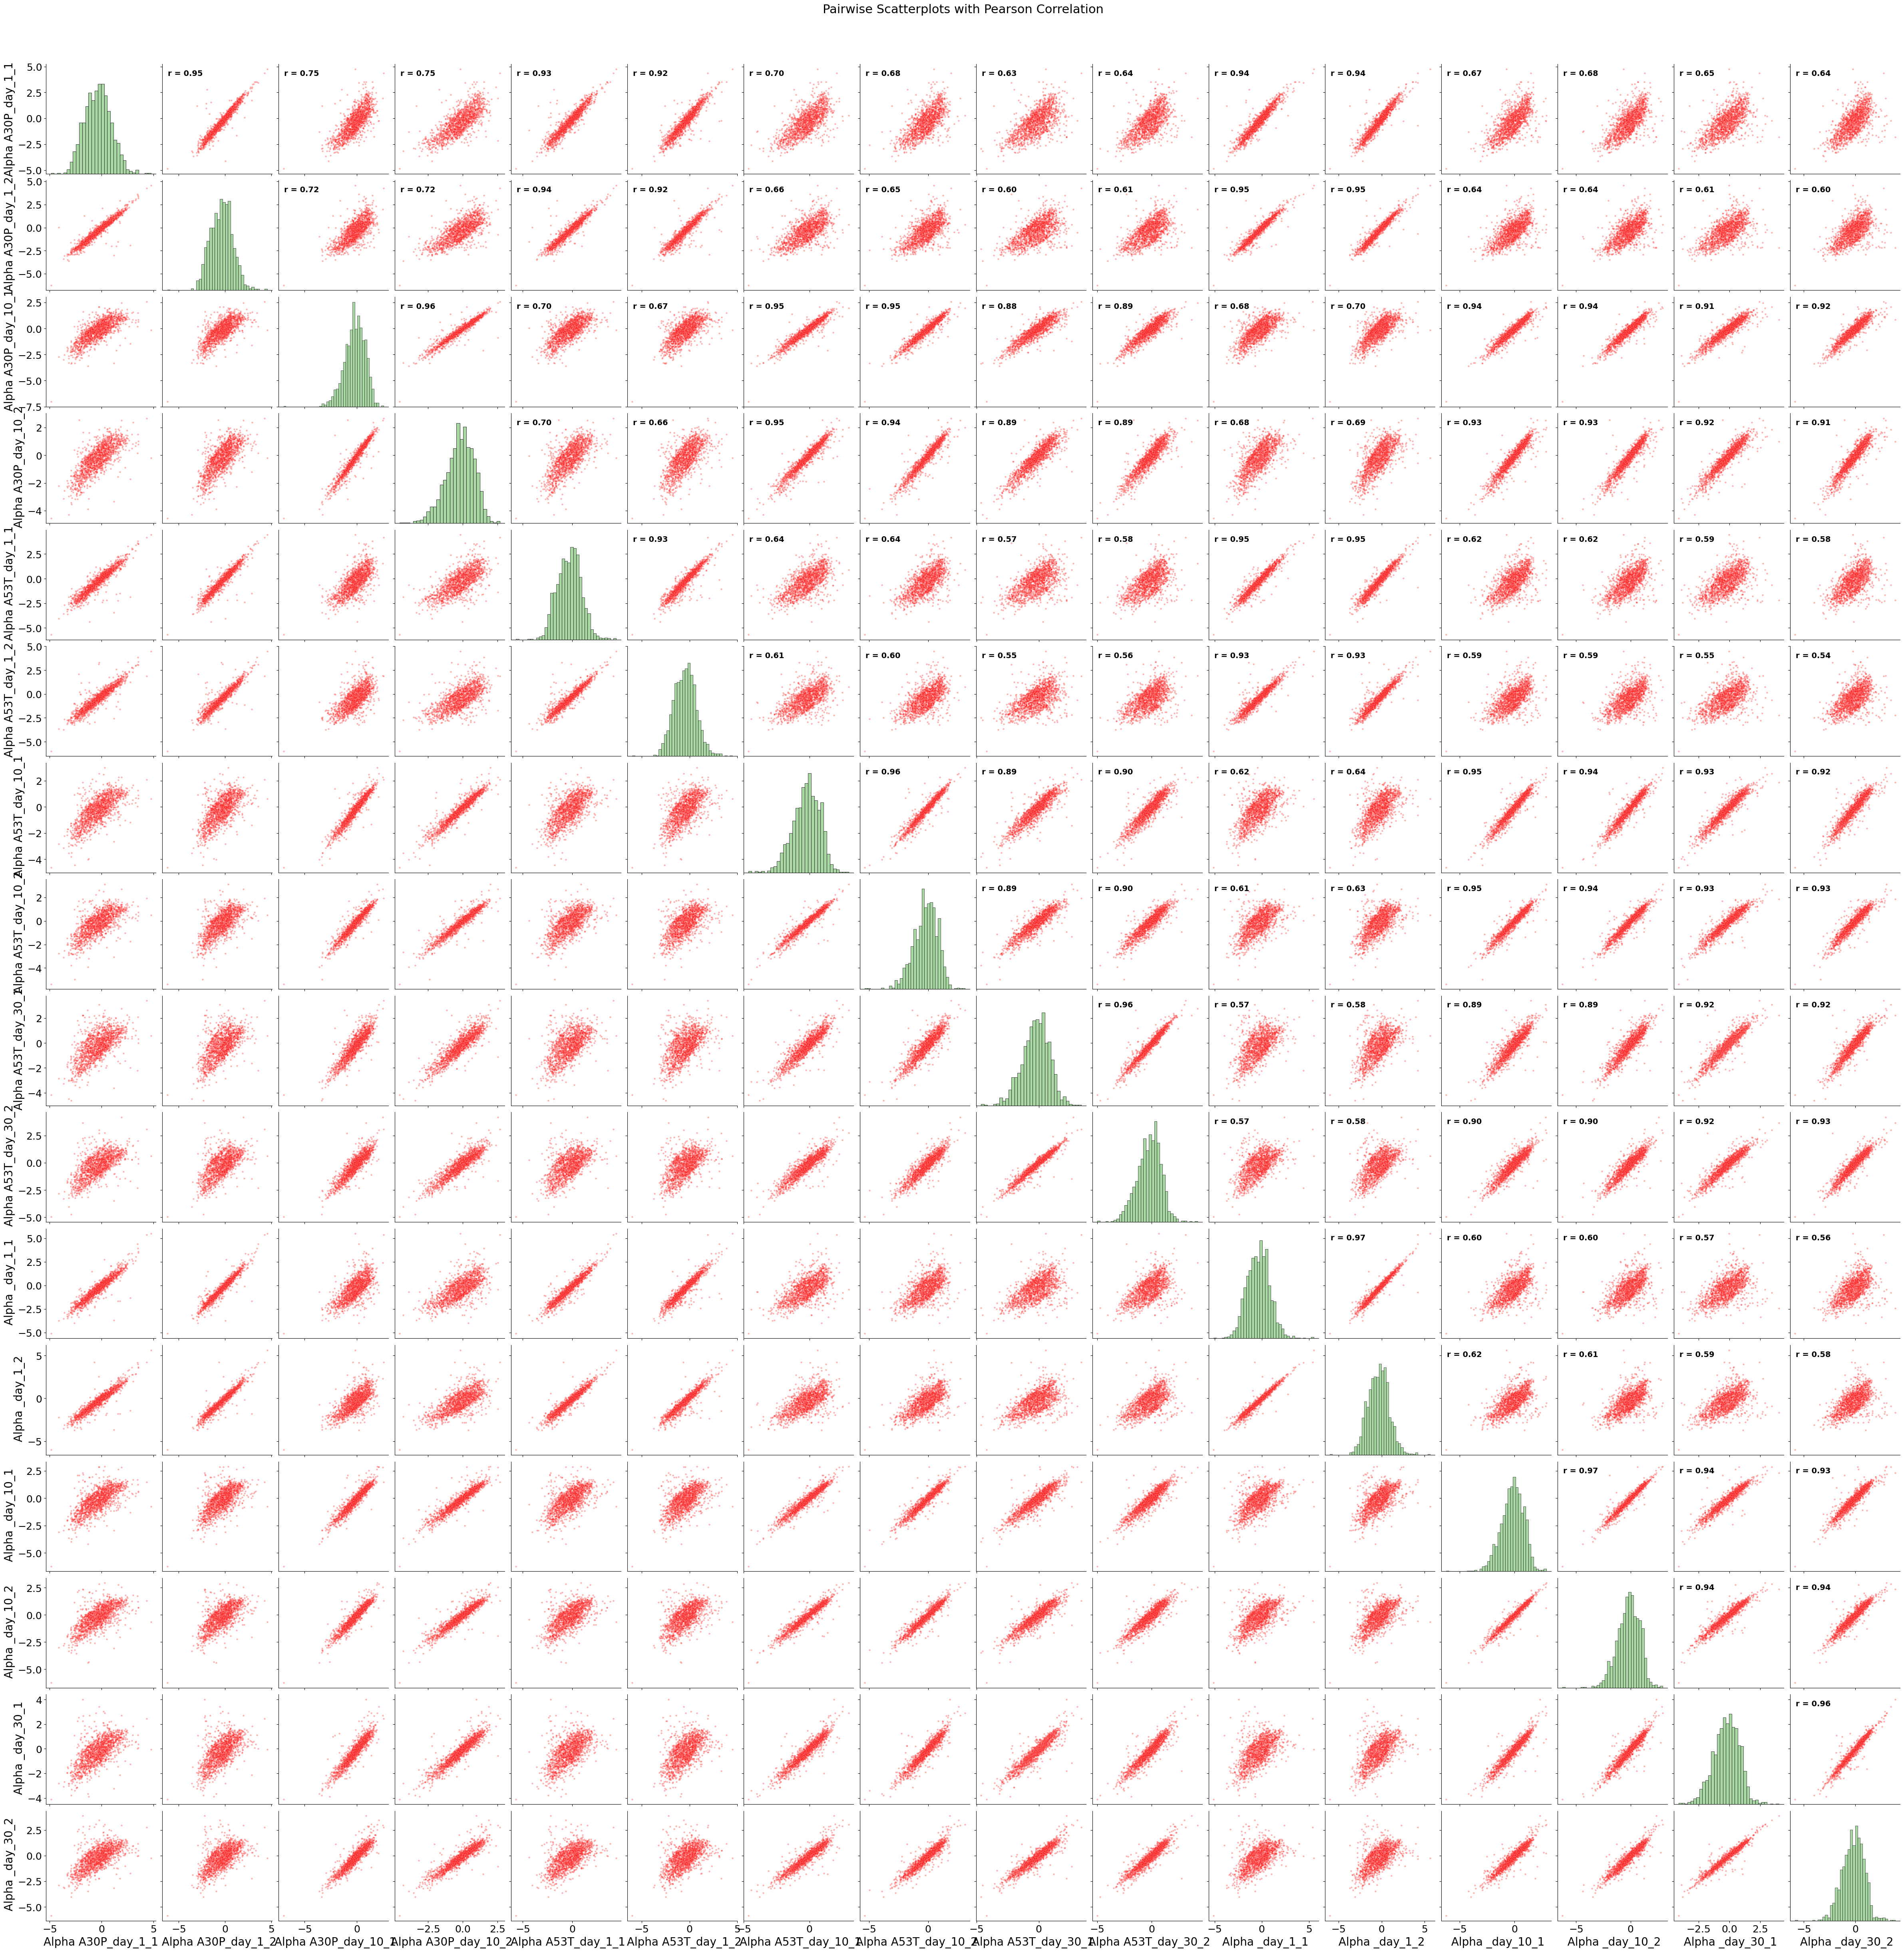

In [12]:
# STEP 5: Define correlation annotator
def corrfunc(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}", xy=(0.05, 0.95), xycoords=ax.transAxes,
                ha='left', va='top', fontsize=14, fontweight='bold')

# STEP 6: Create pairplot
g = sns.pairplot(clean_data, diag_kind="hist",
                 plot_kws={'alpha':0.3, 's':10, 'color': 'red'}, # Added color parameter for scatter plots
                 diag_kws={'color': "#8bca84"}, height=3) # Added height parameter to control figure size
g.map_upper(corrfunc)

# Increase axis label (title) font size
for ax in g.axes.flatten():
    if ax is not None:  # some upper panels can be empty
        ax.set_xlabel(ax.get_xlabel(), fontsize=20)
        ax.set_ylabel(ax.get_ylabel(), fontsize=20)
        ax.tick_params(axis='both', labelsize=18)


plt.suptitle("Pairwise Scatterplots with Pearson Correlation",
             y=1.02, fontsize=22)

# Step 10: Save the figure
png_path = 'Multi_Pro_p_den_od_2.png'
pdf_path = 'Multi_Pro_p_den_od_2.pdf'
plt.savefig(png_path, dpi=300, bbox_inches='tight')
plt.savefig(pdf_path, bbox_inches='tight')
plt.show()